# Image data types and what they mean

import berhasil


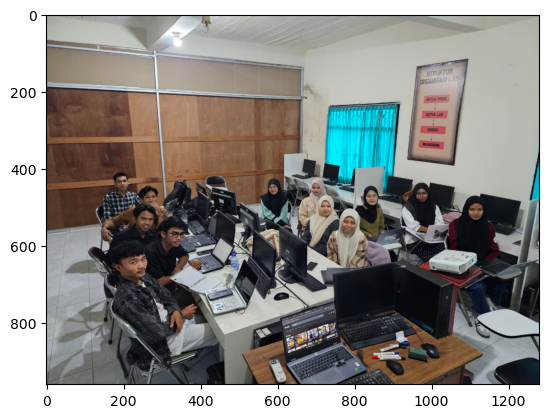

In [10]:
import skimage
import skimage.io
import matplotlib.pyplot as plt

print("import berhasil")

image = skimage.io.imread("mhs.jpg")

plt.imshow(image)

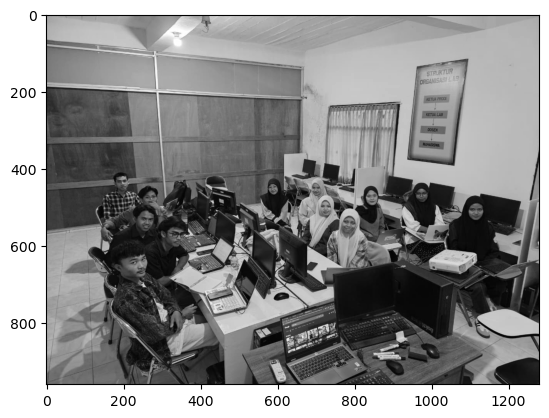

In [16]:
from skimage.color import rgb2gray

grayscale = rgb2gray(image)
plt.imshow(grayscale,'gray')

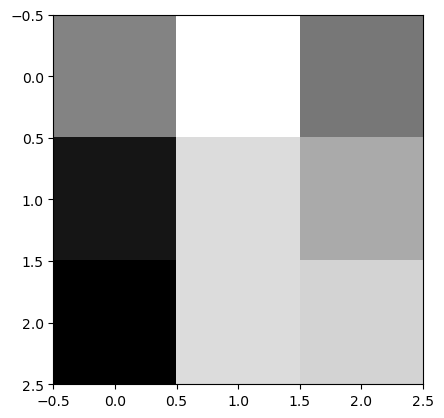

In [38]:
crop = grayscale[600:603,600:603]
plt.imshow(crop,'gray')

In [42]:
crop*2

array([[1.47866039, 1.51344157, 1.47482118],
       [1.44728784, 1.50332078, 1.48937647],
       [1.44111137, 1.50332078, 1.50111843]])

In [63]:
import numpy as np
img_uint8 = (grayscale * 255).astype(np.uint8)
print(img_uint8)

[[154 154 154 ... 154 154 153]
 [154 154 154 ... 156 155 155]
 [157 156 156 ... 157 156 156]
 ...
 [ 99 106  94 ...  33  35  36]
 [105 114  97 ...  37  39  40]
 [111 120 101 ...  39  41  42]]


In [147]:
grayscale

array([[0.60531333, 0.60531333, 0.60531333, ..., 0.60697294, 0.60697294,
        0.60305137],
       [0.60531333, 0.60531333, 0.60531333, ..., 0.61481608, 0.61089451,
        0.61089451],
       [0.61707804, 0.61315647, 0.61315647, ..., 0.61873765, 0.61481608,
        0.61481608],
       ...,
       [0.3899098 , 0.41736078, 0.37030196, ..., 0.13229961, 0.14014275,
        0.14406431],
       [0.41343922, 0.44873333, 0.38206667, ..., 0.14798588, 0.15582902,
        0.15975059],
       [0.43696863, 0.47226275, 0.39775294, ..., 0.15582902, 0.16367216,
        0.16759373]])

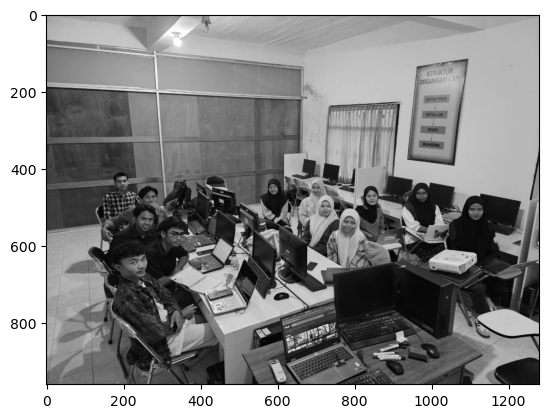

In [69]:
plt.imshow(img_uint8,'gray')

In [71]:
crop = img_uint8[600:603,600:603]

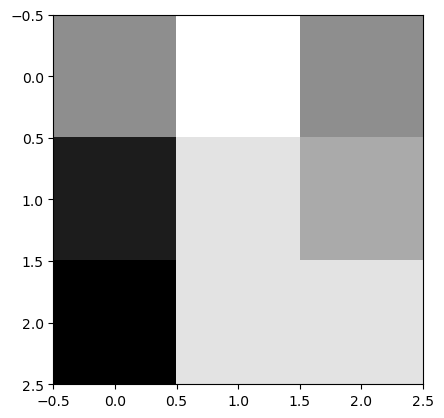

In [73]:
plt.imshow(crop,'gray')

In [75]:
crop

array([[188, 192, 188],
       [184, 191, 189],
       [183, 191, 191]], dtype=uint8)

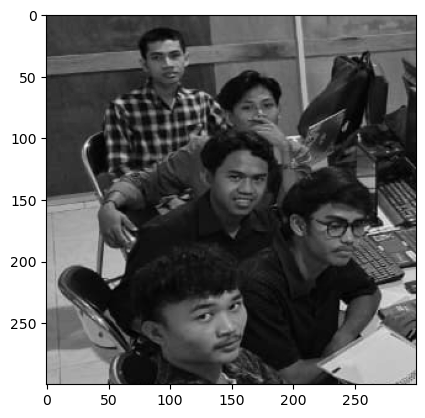

In [95]:
crop2 = img_uint8[400:700,100:400]
plt.imshow(crop2,'gray')

In [97]:
crop2


array([[ 59,  60,  62, ..., 112, 113, 114],
       [ 58,  60,  62, ..., 112, 112, 113],
       [ 58,  59,  61, ..., 113, 112, 111],
       ...,
       [174, 174, 174, ..., 200, 199, 206],
       [174, 174, 174, ..., 214, 190, 205],
       [173, 172, 173, ..., 211, 189, 204]], dtype=uint8)

In [131]:
imageplus = crop2+40
imageplus

array([[ 99, 100, 102, ..., 152, 153, 154],
       [ 98, 100, 102, ..., 152, 152, 153],
       [ 98,  99, 101, ..., 153, 152, 151],
       ...,
       [214, 214, 214, ..., 240, 239, 246],
       [214, 214, 214, ..., 254, 230, 245],
       [213, 212, 213, ..., 251, 229, 244]], dtype=uint8)

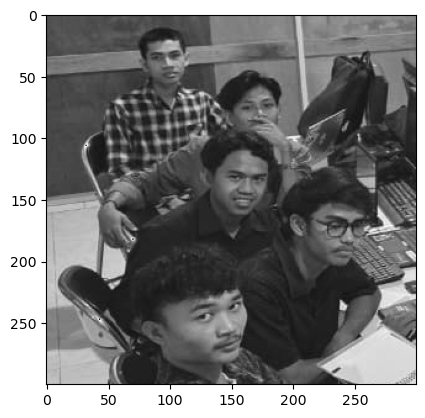

In [105]:
plt.imshow(imageplus,'gray')

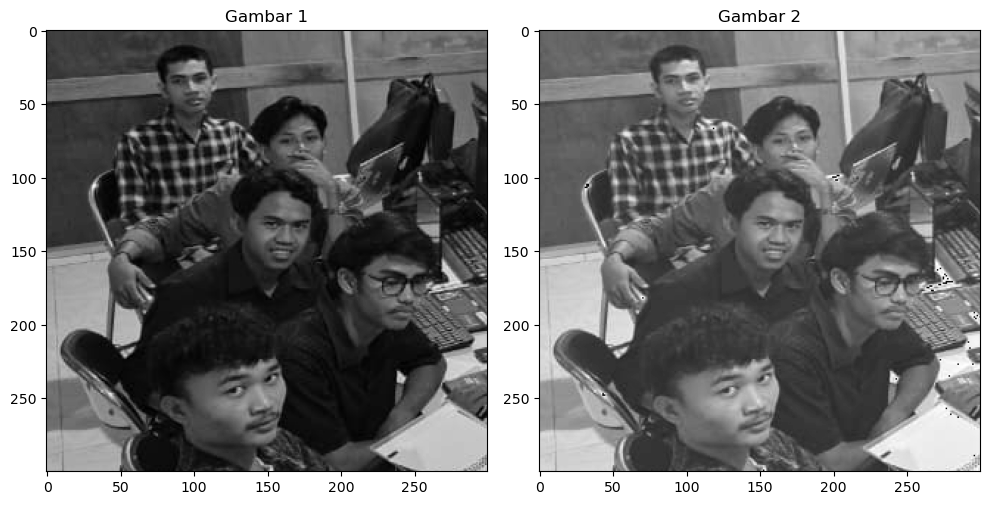

In [133]:
# Buat figure dengan 1 baris 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Tampilkan gambar pertama
axes[0].imshow(crop2, cmap='gray')
axes[0].set_title("Gambar 1")

# Tampilkan gambar kedua
axes[1].imshow(imageplus, cmap='gray')
axes[1].set_title("Gambar 2")

plt.tight_layout()
plt.show()

In [137]:
noise_image = np.random.poisson(lam=3, size=img_uint8.shape)

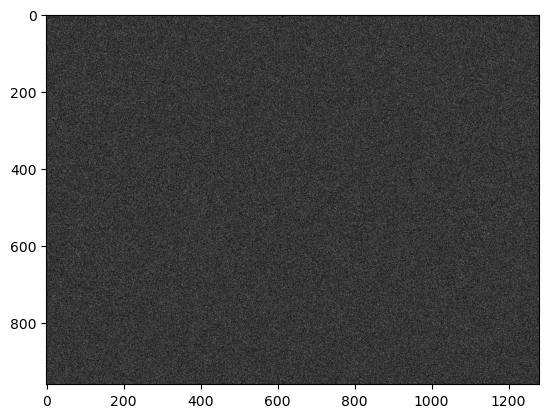

In [159]:
plt.imshow(noise_image,'gray')

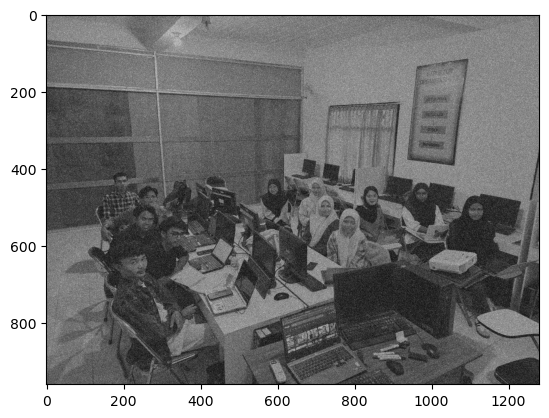

In [161]:
corrupted = img_uint8 + 20*noise_image
plt.imshow(corrupted,'gray')

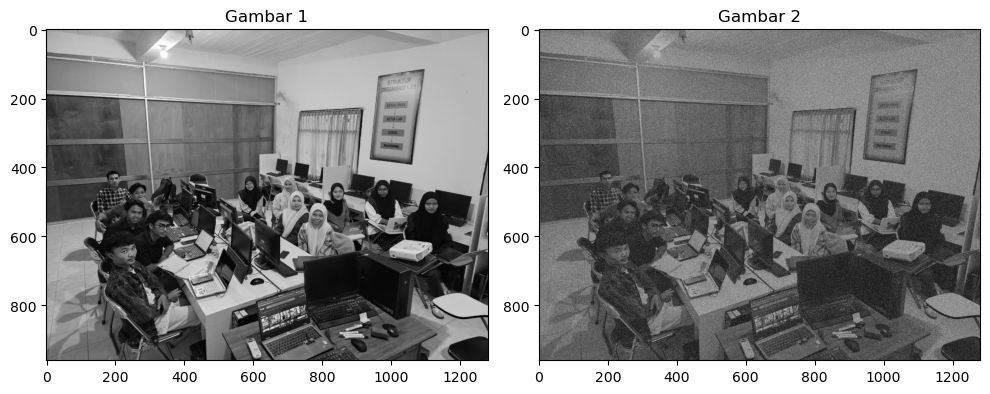

In [163]:
# Buat figure dengan 1 baris 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Tampilkan gambar pertama
axes[0].imshow(img_uint8, cmap='gray')
axes[0].set_title("Gambar 1")

# Tampilkan gambar kedua
axes[1].imshow(corrupted, cmap='gray')
axes[1].set_title("Gambar 2")

plt.tight_layout()
plt.show()

In [185]:
array_bool = img_uint8 > 100
print(array_bool)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True False ... False False False]
 [ True  True False ... False False False]
 [ True  True  True ... False False False]]


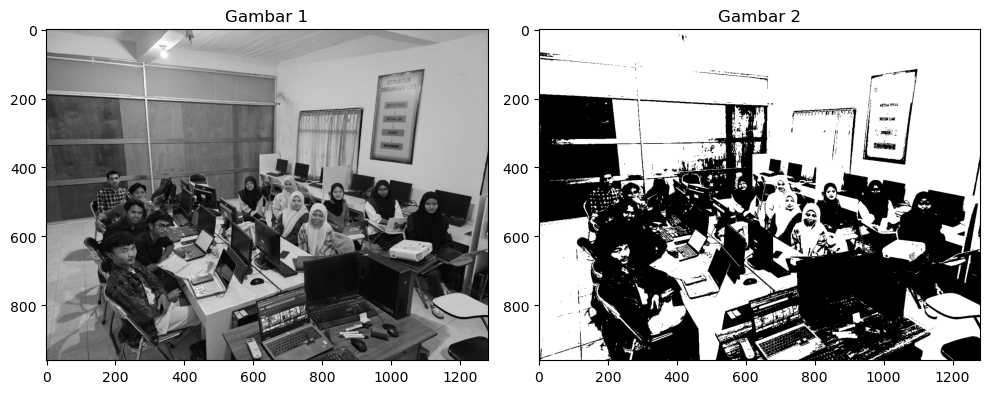

In [187]:
# Buat figure dengan 1 baris 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Tampilkan gambar pertama
axes[0].imshow(img_uint8, cmap='gray')
axes[0].set_title("Gambar 1")

# Tampilkan gambar kedua
axes[1].imshow(array_bool, cmap='gray')
axes[1].set_title("Gambar 2")

plt.tight_layout()
plt.show()

# Splitting channels
When using other software such as ImageJ a very common first step in a processing pipeline is to split the image into separate channels so that they can be processed individually. There is no “splitting function” here, but since we are dealing with an array, we can simply slice the array and select only one of the channels. If we want the first channel we need:

all rows of the first dimension: :

all columns of the second dimension: :

the first channel of the third dimension: 0

<img src="image_com.png">

Jelaskan setiap channel
- Pengertiannya, keggunaannya

In [190]:
image.shape


(960, 1280, 3)

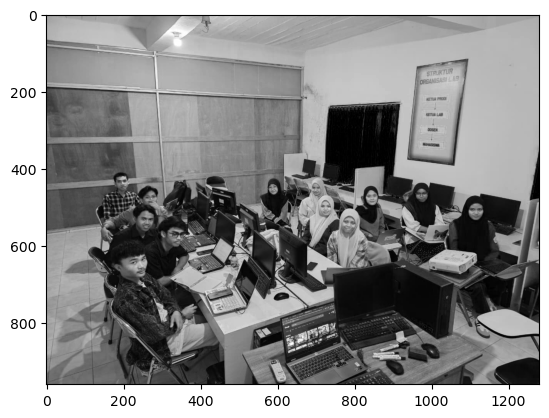

In [200]:
chanelRed = image[:,:,0]
plt.imshow(chanelRed,'gray')

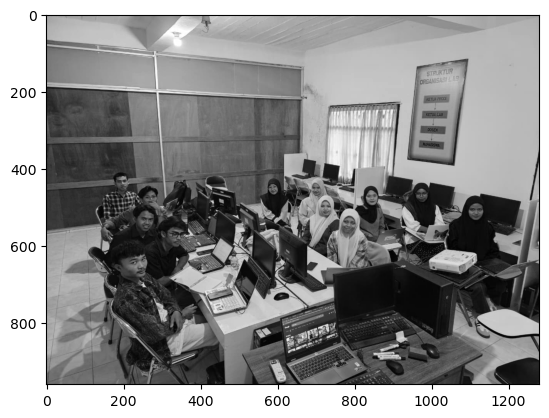

In [204]:
chanelGreen = image[:,:,1]
plt.imshow(chanelGreen,'gray')

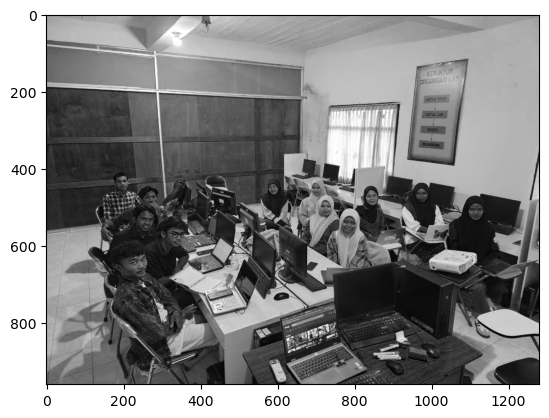

In [206]:
chanelBlue = image[:,:,2]
plt.imshow(chanelBlue,'gray')

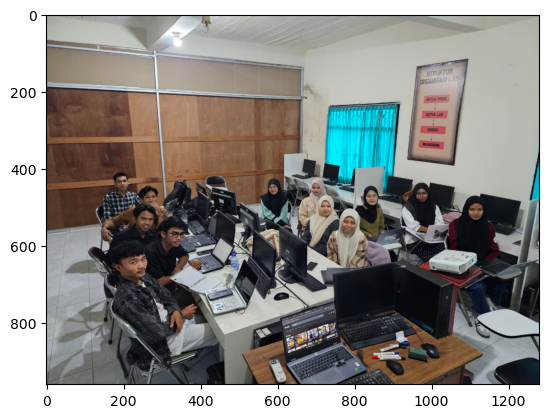

In [246]:
rgb_image = np.dstack((chanelRed, chanelGreen, chanelBlue))  # hasil float [0,1]
# rgb_image_uint8 = (rgb_image * 255).astype(np.uint8) # Jika nilainya float maka harus konversi
plt.imshow(rgb_image)

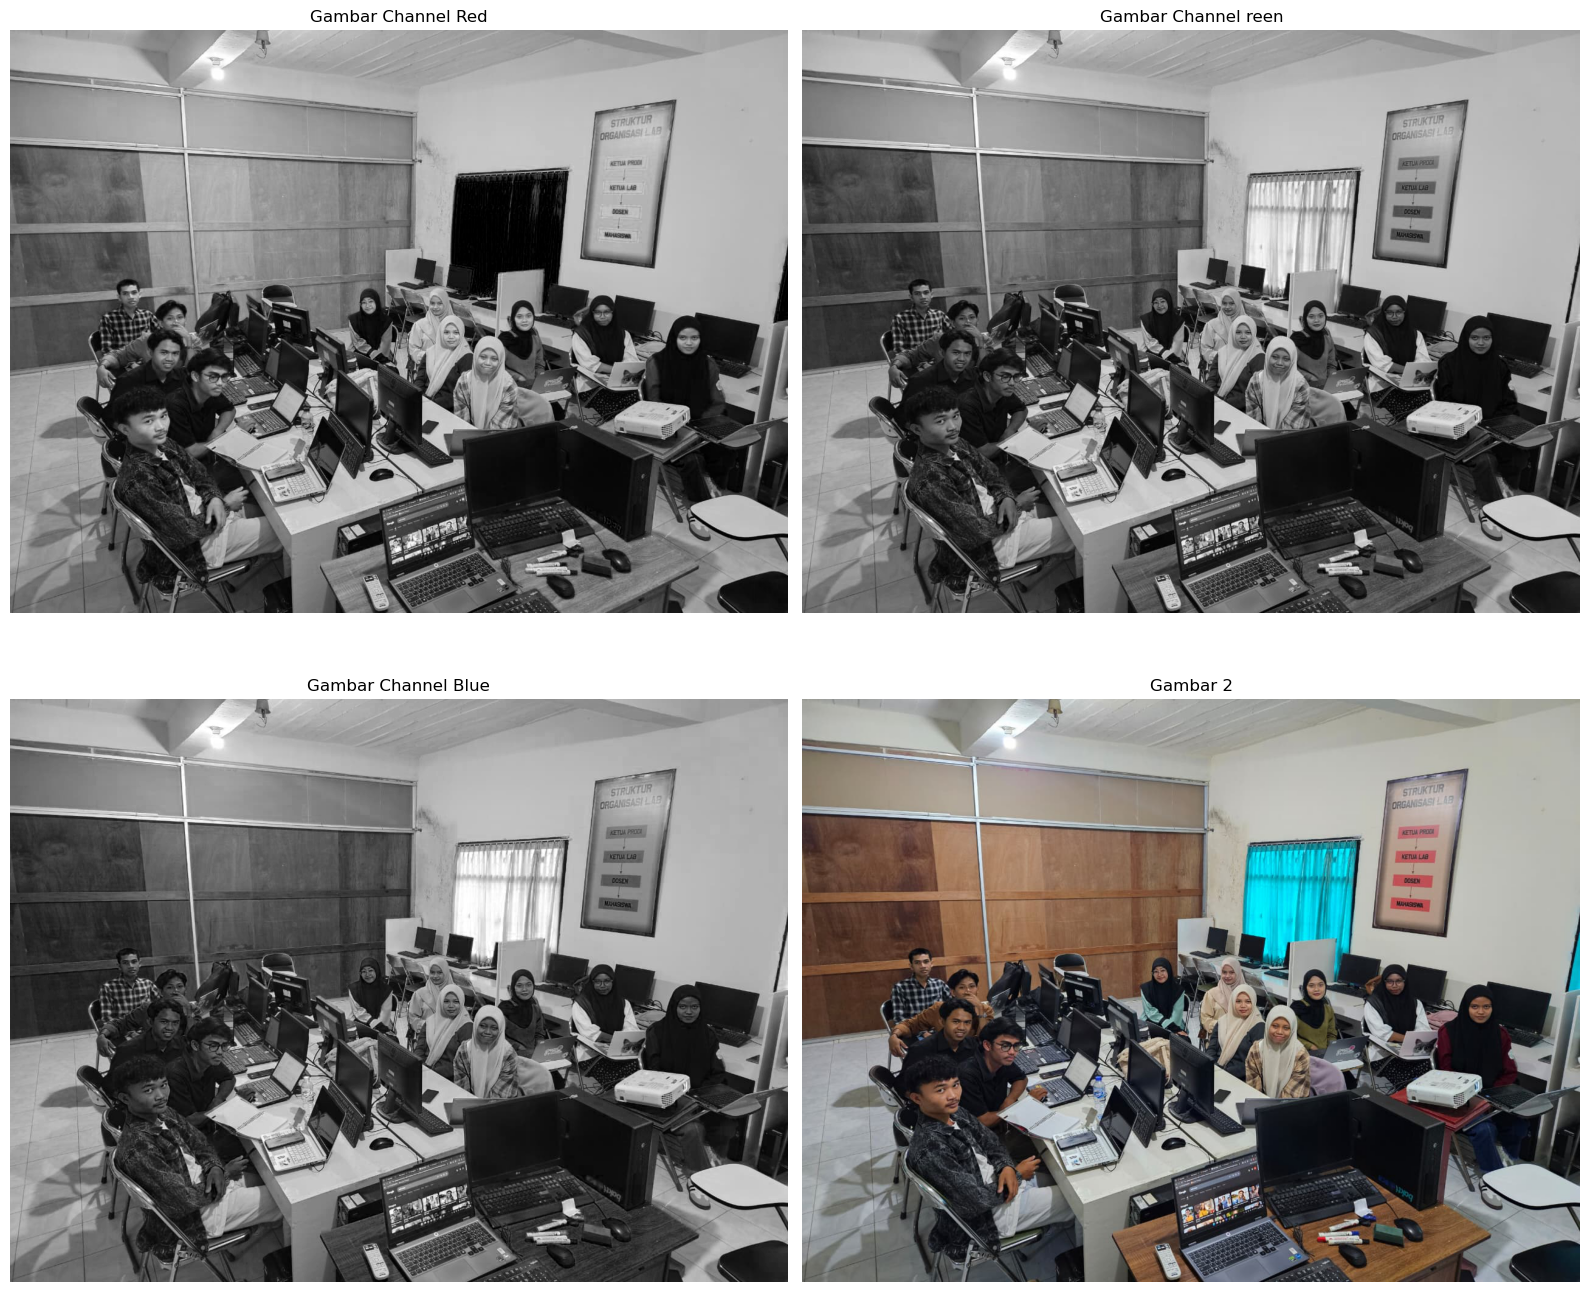

In [250]:
# Buat figure dengan 1 baris 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Tampilkan gambar pertama
axes[0,0].imshow(chanelRed, cmap='gray')
axes[0,0].set_title("Gambar Channel Red")
axes[0,0].axis("off")

# Tampilkan gambar kedua
axes[0,1].imshow(chanelGreen, cmap='gray')
axes[0,1].set_title("Gambar Channel reen")
axes[0,1].axis("off")

# Tampilkan gambar pertama
axes[1,0].imshow(chanelBlue, cmap='gray')
axes[1,0].set_title("Gambar Channel Blue")
axes[1,0].axis("off")

# Tampilkan gambar kedua
axes[1,1].imshow(rgb_image, cmap='gray')
axes[1,1].set_title("Gambar 2")
axes[1,1].axis("off")
plt.tight_layout()
plt.show()

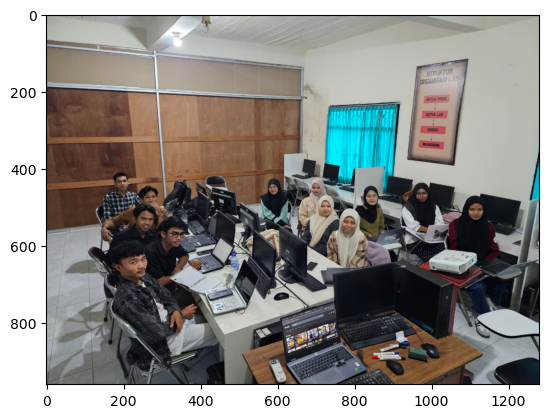

In [242]:
plt.imshow(rgb_image)